In [3]:
from illustris import getGalaxy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from __future__ import division
from sklearn.preprocessing import scale
%matplotlib inline

In [4]:
# Getting data from a particular galaxy (from online)

# Here we pick which kinds of particles we want (0-gas, 4-stars)
# and what information about them 
# (see http://www.illustris-project.org/data/docs/specifications/)
fields=[
    [4,'Coordinates'],
    [4,'Velocities'],
    [4,'Masses'],
    [0,'Coordinates'],
    [0, 'Volume'],
    [0, 'Density']
]
# Here we actually pull the data from online
data=getGalaxy(15,fields)

# And here we put it into simple numpy arrays to work with
rStar=data[0][:,:]
vStar=data[1][:,:]
mStar=data[2][:]
rgas=data[3][:,:]
volgas=data[4][:]
dGas=data[5][:]

In [11]:
# A few useful functions to build from

# given the position and masses of the stars finds their center of mass
def findCenterMass(rStar,mStar):
    com=np.zeros(3)
    for i in range(3):
        com[i]=np.sum(rStar[:,i]*mStar[:])/np.sum(mStar[:])
    return com

# given the position and masses of the stars, some number of pixels and some distance finds
# the projected total mass
def findPixels(coordinates, attribute, nPixels,span):
    pixels=np.zeros((nPixels,nPixels))
    for i in range(nPixels):
        for j in range(nPixels):
            inPix=np.argwhere((span*(((2*i)/nPixels)-1)<coordinates[:,0])
                            &(span*(((2*j)/nPixels)-1)<coordinates[:,1])
                         &(span*(((2*(i+1))/nPixels)-1)>coordinates[:,0])
                         &(span*(((2*(j+1))/nPixels)-1)>coordinates[:,1]))
            if inPix.size==0:
                continue
            pixels[i,j]=np.sum(attribute[inPix])
    return pixels


# Finding and plotting the density profile

# finds the distance between every particle and the origin
def density(nStar, rStar):
    rSquared=np.zeros(nStar)
    for i in range(3):
        rSquared+=rStar[:,i]**2
    r=np.sqrt(rSquared) 
    
    # finds all particles in each of a series of radial bins,
    # finds the total mass in that bin and divides by the volume
    nBins=16
    rMax=16
    rBins=np.linspace(0,rMax,nBins+1)
    density=np.zeros(nBins)
    for i in range(nBins):
        inBin=np.argwhere((r>rBins[i]) & (r<rBins[i+1]))
        if inBin.size==0:
            continue
        density[i]=np.sum(mStar[inBin])/(4*np.pi*(np.power(rBins[i+1],3) - np.power(rBins[i],3))/3)
    return density

In [12]:
# Moving all the co-ordinates such that the galaxy's centered on (0,0,0)

nStar=len(mStar)
com=findCenterMass(rStar,mStar) # finds the center of mass
rStar=rStar-com # recenters all positions around the center of mass

In [28]:
rStar.shape

(226566, 3)

In [32]:
pixels

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

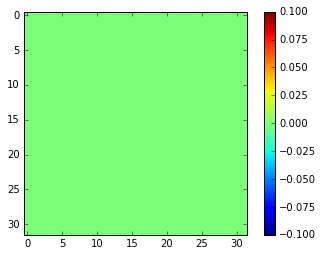

In [31]:
# Making a simple image of the galaxy

pixels=findPixels(rgas,dGas,32,16)
galaxyPlot=plt.gca()
image=galaxyPlot.imshow(pixels)
plt.colorbar(image)
plt.show(galaxyPlot)

In [ ]:
# Here we actually pull the data from online
data2=getGalaxy(300122,fields)

# And here we put it into simple numpy arrays to work with
rStar2=data2[0][:,:]
vStar2=data2[1][:,:]
mStar2=data2[2][:]
rgas2=data2[3][:,:]
volgas2=data2[4][:]

In [ ]:
# Moving all the co-ordinates such that the galaxy's centered on (0,0,0)

nStar2=len(mStar2)
com2=findCenterMass(rStar2,mStar2) # finds the center of mass
rStar2=rStar2-com2 # recenters all positions around the center of mass

In [ ]:
# Making a simple image of the galaxy

pixels2=findPixels(rStar2,mStar2,32,16)
galaxyPlot2=plt.gca()
image2=galaxyPlot2.imshow(pixels2)
plt.colorbar(image2)
plt.show(galaxyPlot2)

In [ ]:
# Here we actually pull the data from online
data3=getGalaxy(342260,fields)

# And here we put it into simple numpy arrays to work with
rStar3=data3[0][:,:]
vStar3=data3[1][:,:]
mStar3=data3[2][:]
rgas3=data3[3][:,:]
volgas3=data3[4][:]

# Moving all the co-ordinates such that the galaxy's centered on (0,0,0)

nStar3=len(mStar3)
com3=findCenterMass(rStar3,mStar3) # finds the center of mass
rStar3=rStar3-com3 # recenters all positions around the center of mass

# Making a simple image of the galaxy

pixels3=findPixels(rStar3,mStar3,32,16)
galaxyPlot3=plt.gca()
image3=galaxyPlot3.imshow(pixels3)
plt.colorbar(image3)
plt.show(galaxyPlot3)

In [ ]:
# Here we actually pull the data from online
data4=getGalaxy(382533,fields)

# And here we put it into simple numpy arrays to work with
rStar4=data4[0][:,:]
vStar4=data4[1][:,:]
mStar4=data4[2][:]
rgas4=data4[3][:,:]
volgas4=data4[4][:]

# Moving all the co-ordinates such that the galaxy's centered on (0,0,0)

nStar4=len(mStar4)
com4=findCenterMass(rStar4,mStar4) # finds the center of mass
rStar4=rStar4-com4 # recenters all positions around the center of mass

# Making a simple image of the galaxy

pixels4=findPixels(rStar4,mStar4,32,16)
galaxyPlot4=plt.gca()
image4=galaxyPlot4.imshow(pixels4)
plt.colorbar(image4)
plt.show(galaxyPlot4)